In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values
df=pd.read_csv('virtualInternshipData_ADS2001.csv',encoding='latin1')
df=df.drop(df.columns[0],axis=1)


In [3]:
#drop the unuseful value
df=df.drop(['ChatGroup','content','roomName','Line_ID','wordCount'],axis=1)
df

,userIDs,implementation,group_id,RoleName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore
0,1,a,2,Mentor,0,0,0,0,0,0,4
1,1,a,2,Mentor,0,0,0,0,0,0,4
2,1,a,2,Mentor,0,0,0,0,0,0,4
3,1,a,2,Mentor,0,0,0,1,0,0,4
4,1,a,2,Mentor,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
19175,392,o,6,Player,0,0,0,0,0,0,5
19176,388,o,6,Player,0,0,0,0,0,0,8
19177,367,o,6,Mentor,0,0,0,0,0,0,4
19178,393,o,6,Player,0,0,0,0,0,0,4


In [4]:
#drop the Mentor 
mask=df['RoleName']=='Mentor'
df1=df.drop(df[mask].index)
a=df1['userIDs'].unique()
# a.shape
a

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

In [5]:
df1.isna().any()#check whether it have Nan value. return True ffor RoleName
df1=df1.dropna()#drop the Nan value

In [6]:
df1.sort_values(by=['userIDs'],inplace=True)
# this columns is used to combining bassed on "usedIDs", 'implementation', and 'group_id'
# df1
a=df1[df1['userIDs'] == 100]
a.shape

(38, 11)

In [7]:
df1.groupby('implementation')['userIDs'].sum()

implementation
a     21654
b     53268
c    108961
d    154628
e    135164
f    152777
g    138099
h    240279
i    322609
j    187638
k    228358
l    192543
m    338651
n    647139
o    559388
Name: userIDs, dtype: int64

In [14]:
teams=df1.groupby(['userIDs','implementation','group_id','OutcomeScore']).sum()
teams=teams.reset_index(['OutcomeScore'])
# teams.head(370)
print(teams.shape)
teams.head(5)

(369, 7)


,,,OutcomeScore,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
userIDs,implementation,group_id,,,,,,,
2,a,2,4,2,4,17,0,4,0
3,a,2,4,1,4,3,0,1,0
4,a,2,4,2,2,3,1,5,0
5,a,2,2,0,0,6,0,2,0
6,a,2,2,0,2,7,1,3,0


In [9]:
teams.sum(level=['implementation','group_id']).sum()

/var/folders/8s/9tq1cw9n5p9ctt215htgjcw40000gn/T/ipykernel_18597/1702116531.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  teams.sum(level=['implementation','group_id']).sum()


OutcomeScore                             1317
m_experimental_testing                    519
m_making_design_choices                  1709
m_asking_questions                       2916
j_customer_consultants_requests           303
j_performance_parameters_requirements     901
j_communication                           184
dtype: int64

In [10]:
teams.index

MultiIndex([(  2, 'a', 2),
            (  3, 'a', 2),
            (  4, 'a', 2),
            (  5, 'a', 2),
            (  6, 'a', 2),
            (  7, 'a', 2),
            (  8, 'a', 2),
            (  9, 'a', 3),
            ( 10, 'a', 3),
            ( 11, 'a', 3),
            ...
            (384, 'o', 5),
            (385, 'o', 5),
            (386, 'o', 5),
            (387, 'o', 5),
            (388, 'o', 6),
            (389, 'o', 6),
            (390, 'o', 6),
            (391, 'o', 6),
            (392, 'o', 6),
            (393, 'o', 6)],
           names=['userIDs', 'implementation', 'group_id'], length=369)

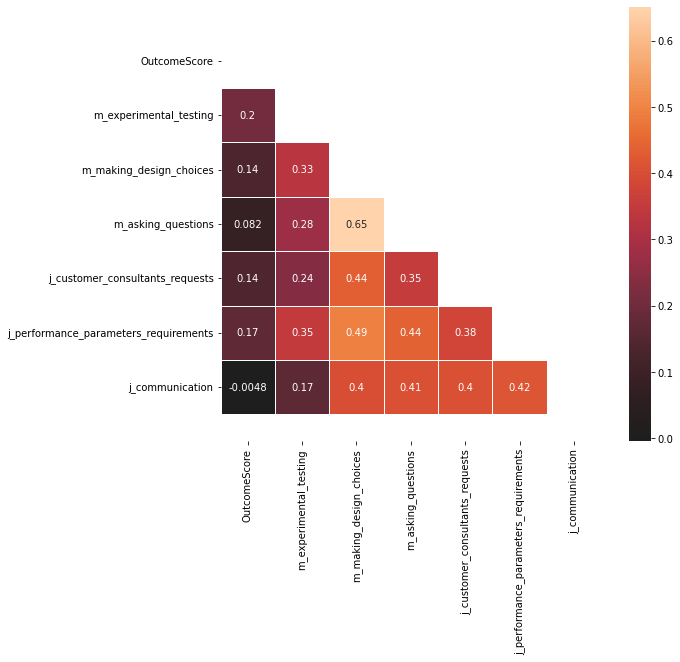

In [11]:
corrs = teams.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);